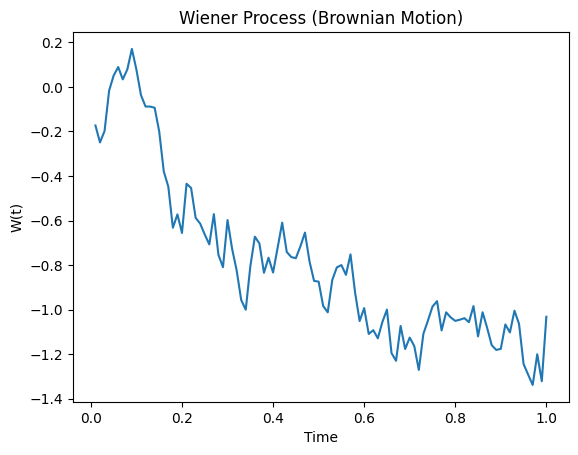

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate Wiener process
T = 1
n_steps = 100
dt = T / n_steps
t = np.linspace(0, T, n_steps+1)
dW = np.random.normal(size=n_steps) * np.sqrt(dt)
W = np.cumsum(dW)

# Plot Wiener process
plt.plot(t[1:], W)
plt.title('Wiener Process (Brownian Motion)')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.show()


In [9]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, r, sigma, T, t, d1, d2):
    """
    Calculate Black-Scholes call option price.
    """
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    C = S * N_d1 - np.exp(-r * (T - t)) * K * N_d2
    return C

def girsanov_transform(S, r, sigma, T, t, theta):
    """
    Apply Girsanov transformation to switch to risk-neutral measure.
    """
    d1_p = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2_p = d1_p - sigma * np.sqrt(T - t)

    # Adjust parameters under risk-neutral measure using Girsanov
    d1_q = d1_p - theta * sigma * np.sqrt(T - t)
    d2_q = d2_p - theta * sigma * np.sqrt(T - t)

    return d1_p, d2_p, d1_q, d2_q

# Parameters
S0 = 100      # Initial stock price
K = 105       # Strike price
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
T = 1         # Time to maturity
t = 0         # Current time
theta = 0.1   # Girsanov parameter

# Girsanov transformation
d1_p, d2_p, d1_q, d2_q = girsanov_transform(S0, r, sigma, T, t, theta)

# Option pricing under physical measure
call_price_p = black_scholes_call(S0, K, r, sigma, T, t, d1_p, d2_p)

# Option pricing under risk-neutral measure
call_price_q = black_scholes_call(S0, K, r, sigma, T, t, d1_q, d2_q)

# Display results
print(f"Under Physical Measure (P): d1 = {d1_p:.3f}, d2 = {d2_p:.3f}")
print(f"Call Option Price under Physical Measure: {call_price_p:.10f}")

print(f"\nUnder Risk-Neutral Measure (Q): d1 = {d1_q:.3f}, d2 = {d2_q:.3f}")
print(f"Call Option Price under Risk-Neutral Measure: {call_price_q:.10f}")


Under Physical Measure (P): d1 = 0.106, d2 = -0.094
Call Option Price under Physical Measure: 8.0213522351

Under Risk-Neutral Measure (Q): d1 = 0.086, d2 = -0.114
Call Option Price under Risk-Neutral Measure: 8.0197654444


In [12]:
import sympy as sp

t, W = sp.symbols('t W')
X = sp.Function('X')(t)
f = sp.Function('f')(t, X)

# Define Ito process
mu, sigma = sp.symbols('mu sigma')
dX = mu * sp.diff(t) + sigma * sp.diff(W)

# Apply Ito's Lemma
df = f.diff(t) + mu * f.diff(X) + 0.5 * sigma**2 * f.diff(X, X)

# Display the result
df.simplify()


mu*Derivative(f(t, X(t)), X(t)) + 0.5*sigma**2*Derivative(f(t, X(t)), (X(t), 2)) + Derivative(X(t), t)*Derivative(f(t, X(t)), X(t)) + Subs(Derivative(f(_xi_1, X(t)), _xi_1), _xi_1, t)

In [14]:
from scipy.optimize import fsolve

# Define Black-Scholes formula
def black_scholes(sigma, S, X, T, r):
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d1 - sigma * np.sqrt(T))

# Define implied volatility function
def implied_volatility(sigma, S, X, T, r, option_price):
    return black_scholes(sigma, S, X, T, r) - option_price

# Example usage
option_price = 10.0
S = 100.0
X = 95.0
T = 1.0
r = 0.05

# Solve for implied volatility
implied_volatility_result = fsolve(implied_volatility, 0.2, args=(S, X, T, r, option_price))[0]
implied_volatility_result


0.07971085621347007

In [19]:
from scipy.optimize import fsolve
from scipy.optimize import minimize

# Define Black-Scholes formula
def black_scholes(sigma, S, X, T, r):
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d1 - sigma * np.sqrt(T))

# Define implied volatility function
def implied_volatility(sigma, S, X, T, r, option_price):
    return black_scholes(sigma, S, X, T, r) - option_price

# Example usage
option_price = 10.0
S = 100.0
X = 95.0
T = 1.0
r = 0.05

# Solve for implied volatility
implied_volatility_result = fsolve(implied_volatility, 0.2, args=(S, X, T, r, option_price))[0]
implied_volatility_result

0.07971085621347007

In [16]:
# Example usage
option_price = 10.0
S = 100.0
X = 95.0
T = 1.0
r = 0.05

constraints = ({'type': 'eq', 'fun': lambda sigma: black_scholes(sigma, S, X, T, r) - option_price})

result = minimize(implied_volatility, 0.2, args=(S, X, T, r, option_price),
                  method='SLSQP', constraints=constraints)

# implied_volatility_result = fsolve(implied_volatility, 0.2, args=(S, X, T, r, option_price))[0]

In [18]:
result.x

array([0.07971088])